# Hypothesis Testing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [8]:
ibm_df = pd.read_csv('../data/IBM_2013-09-01_2013-11-11_1d.csv', index_col=0, parse_dates=True)

returns_sample = np.log(ibm_df['Close'].div(ibm_df['Close'].shift(1)))

ibm_df.shape

(49, 7)

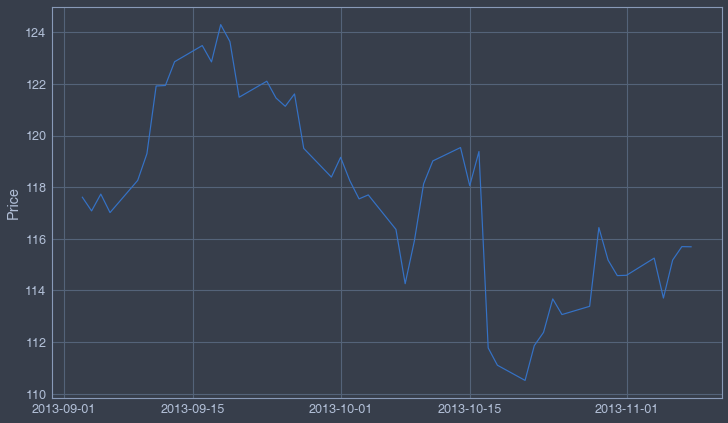

In [9]:
plt.plot(ibm_df['Close'].index, ibm_df['Close'].values)
plt.ylabel('Price');

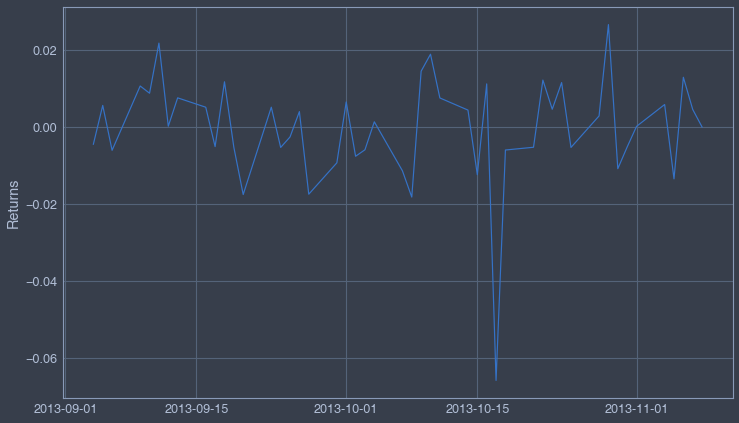

In [11]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

In [12]:
n = len(returns_sample)

test_statistic = ((returns_sample.mean() - 0) / (returns_sample.std()/np.sqrt(n)))
p_val = 2 *(1 - t.cdf(test_statistic, n - 1))

print(f't test statistic: {test_statistic}\np-value is: {p_val}')

t test statistic: -0.17061092833002253
p-value is: 1.134753160065455


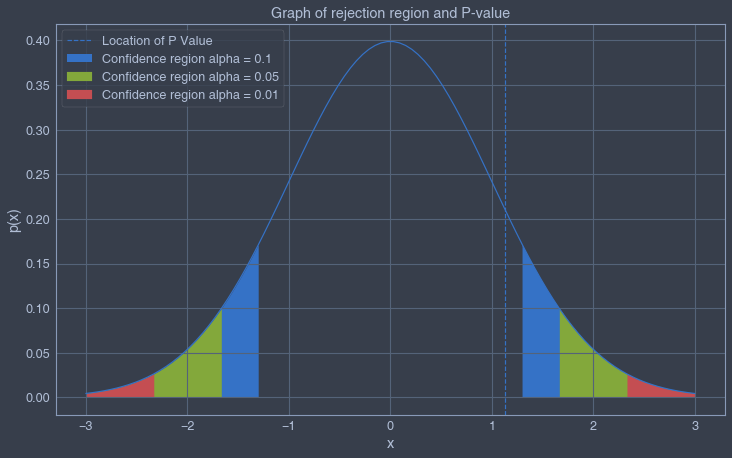

In [17]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.282, label = 'Confidence region alpha = 0.1')
ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region alpha = 0.05', color = 'g')
ax.fill_between(x, 0, y, where = x > 2.326, label = 'Confidence region alpha = 0.01', color = 'r')
ax.fill_between(x, 0, y, where = x < -1.282, color='b')
ax.fill_between(x, 0, y, where = x < -1.645, color = 'g')
ax.fill_between(x, 0, y, where = x < -2.326, color = 'r')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

In [44]:
class DwdStocks:
    def __init__(self, symbols, start, end):
        self.symbols = symbols
        self.start   = start
        self.end     = end
        self.get_data()

    def get_data(self):
        self.data = yf.download(
            self.symbols,
            start=self.start,
            end=self.end,
            
            auto_adjust=True,
            progress=False,
            show_errors=True
        )
    
    def show_data(self, limit=5):
        return self.data.head(limit)

In [40]:
class h0_ha(DwdStocks):
    def __init__(self, tickers_list, start, end, h0='mean=0'):
        print('wrong h0')
        super().__init__(tickers_list, start, end)
        self.h0 = h0
    
    def check_h0(self):
        pass
    
    def testing(self):
        pass
    
    def show_result(self, plot=True):
        pass

In [41]:
st = h0_ha(['BAC'], dt.datetime(2021, 1, 1), dt.datetime(2022, 1, 1), h0='mean=100')
st.show_data()

wrong h0


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,28.548861,28.651960,27.883409,28.145842,51483900
2021-01-05,28.277057,28.623843,28.033370,28.361410,48507000
2021-01-06,29.898514,30.573338,29.392395,30.132830,107002800
2021-01-07,31.220047,31.510595,30.779535,30.798281,74358500
2021-01-08,30.854513,30.929495,30.095337,30.488983,44641400
